In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('https://raw.githubusercontent.com/Likhitha02-tech/PDS/refs/heads/main/Data.csv')

# Remove leading/trailing whitespace from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

print(df)

   Height   Weight   Age   Grip strength  Frailty
0    65.8      112    30              30        N
1    71.5      136    19              31        N
2    69.4      153    45              29        N
3    68.2      142    22              28        Y
4    67.8      144    29              24        Y
5    68.7      123    50              26        N
6    69.8      141    51              22        Y
7    70.1      136    23              20        Y
8    67.9      112    17              19        N
9    66.8      120    39              31        N


In [2]:
# prompt: Convert qualitative data  into quantitative values for easier statistical modeling (e.g., N -> 0, Y -> 1).

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column of the DataFrame
for column in df.columns:
  # Check if the column's data type is object (string)
  if df[column].dtype == 'object':
    # Fit and transform the column using LabelEncoder
    df[column] = le.fit_transform(df[column])

print(df)


   Height   Weight   Age   Grip strength   Frailty
0    65.8      112    30              30         0
1    71.5      136    19              31         0
2    69.4      153    45              29         0
3    68.2      142    22              28         1
4    67.8      144    29              24         1
5    68.7      123    50              26         0
6    69.8      141    51              22         1
7    70.1      136    23              20         1
8    67.9      112    17              19         0
9    66.8      120    39              31         0


In [3]:
df.columns

Index(['Height', ' Weight', ' Age', ' Grip strength', ' Frailty'], dtype='object')

In [4]:
# prompt: Standardize or normalize the variables (if necessary), such as scaling grip strength or normalizing height and weight.

from sklearn.preprocessing import StandardScaler

# Select the columns you want to standardize using their names
columns_to_standardize = df.columns[1:4]  # Select columns from index 1 to 3 (exclusive)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
print(df)

   Height    Weight       Age   Grip strength   Frailty
0    65.8 -1.473912 -0.204911        0.932505         0
1    71.5  0.303670 -1.106520        1.165631         0
2    69.4  1.562791  1.024556        0.699379         0
3    68.2  0.748066 -0.860627        0.466252         1
4    67.8  0.896198 -0.286876       -0.466252         1
5    68.7 -0.659187  1.434378        0.000000         0
6    69.8  0.674000  1.516343       -0.932505         1
7    70.1  0.303670 -0.778662       -1.398757         1
8    67.9 -1.473912 -1.270449       -1.631883         0
9    66.8 -0.881385  0.532769        1.165631         0


In [5]:
# prompt: Handle missing values (e.g., using imputation or removing incomplete rows).

# Check for missing values
print(df.isnull().sum())



# Alternatively, you can remove rows with missing values
# df.dropna(inplace=True)

# Print the updated DataFrame
print(df.head())
print(df.isnull().sum())


Height            0
 Weight           0
 Age              0
 Grip strength    0
 Frailty          0
dtype: int64
   Height    Weight       Age   Grip strength   Frailty
0    65.8 -1.473912 -0.204911        0.932505         0
1    71.5  0.303670 -1.106520        1.165631         0
2    69.4  1.562791  1.024556        0.699379         0
3    68.2  0.748066 -0.860627        0.466252         1
4    67.8  0.896198 -0.286876       -0.466252         1
Height            0
 Weight           0
 Age              0
 Grip strength    0
 Frailty          0
dtype: int64


In [6]:
# prompt: Save the cleaned data for reproducibility.

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)


In [7]:
# prompt: Perform descriptive statistics (mean, median, standard deviation) for each variable.  convert this Frailty column into numeric don't change column name

import pandas as pd

# Assuming 'df' is your DataFrame

# Check the actual column names in the DataFrame
print(df.columns)

# Convert 'Frailty?' to numeric (if it's not already), correcting the column name
# The original code had a potential error where it checked for 'Frailty?'
# even if the column was already renamed to 'Frailty'
if 'Frailty?' in df.columns:
  df['Frailty?'] = df['Frailty?'].map({'N': 0, 'Y': 1})

# Check if Frailty column exists (without '?') and convert to numeric
if 'Frailty' in df.columns and df['Frailty'].dtype == object:
  df['Frailty'] = pd.to_numeric(df['Frailty'], errors='coerce')

print(df.head())

# Descriptive statistics for each variable
# Include only numeric columns for descriptive statistics
descriptive_stats = df.select_dtypes(include='number').agg(['mean', 'median', 'std'])

print(descriptive_stats)

Index(['Height', ' Weight', ' Age', ' Grip strength', ' Frailty'], dtype='object')
   Height    Weight       Age   Grip strength   Frailty
0    65.8 -1.473912 -0.204911        0.932505         0
1    71.5  0.303670 -1.106520        1.165631         0
2    69.4  1.562791  1.024556        0.699379         0
3    68.2  0.748066 -0.860627        0.466252         1
4    67.8  0.896198 -0.286876       -0.466252         1
           Height        Weight           Age   Grip strength   Frailty
mean    68.600000 -4.440892e-16  1.110223e-17    4.440892e-17  0.400000
median  68.450000  3.036704e-01 -2.458934e-01    2.331262e-01  0.000000
std      1.670662  1.054093e+00  1.054093e+00    1.054093e+00  0.516398


In [8]:
# prompt: Perform descriptive statistics (mean, median, standard deviation) for each variable.  convert this Frailty column into numeric don't change column name

import pandas as pd

# Assuming 'df' is your DataFrame

# Check the actual column names in the DataFrame
print(df.columns)

# Convert 'Frailty?' to numeric (if it's not already), correcting the column name
# The original code had a potential error where it checked for 'Frailty?'
# even if the column was already renamed to 'Frailty'
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column of the DataFrame
for column in df.columns:
  # Check if the column's data type is object (string)
  if df[column].dtype == 'object':
    # Fit and transform the column using LabelEncoder
    df[column] = le.fit_transform(df[column])
print(df.head())

# Descriptive statistics for each variable
# Include only numeric columns for descriptive statistics
descriptive_stats = df.select_dtypes(include='number').agg(['mean', 'median', 'std'])

print(descriptive_stats)

Index(['Height', ' Weight', ' Age', ' Grip strength', ' Frailty'], dtype='object')
   Height    Weight       Age   Grip strength   Frailty
0    65.8 -1.473912 -0.204911        0.932505         0
1    71.5  0.303670 -1.106520        1.165631         0
2    69.4  1.562791  1.024556        0.699379         0
3    68.2  0.748066 -0.860627        0.466252         1
4    67.8  0.896198 -0.286876       -0.466252         1
           Height        Weight           Age   Grip strength   Frailty
mean    68.600000 -4.440892e-16  1.110223e-17    4.440892e-17  0.400000
median  68.450000  3.036704e-01 -2.458934e-01    2.331262e-01  0.000000
std      1.670662  1.054093e+00  1.054093e+00    1.054093e+00  0.516398


   Height    Weight       Age   Grip strength   Frailty
0    65.8 -1.473912 -0.204911        0.932505         0
1    71.5  0.303670 -1.106520        1.165631         0
2    69.4  1.562791  1.024556        0.699379         0
3    68.2  0.748066 -0.860627        0.466252         1
4    67.8  0.896198 -0.286876       -0.466252         1
5    68.7 -0.659187  1.434378        0.000000         0
6    69.8  0.674000  1.516343       -0.932505         1
7    70.1  0.303670 -0.778662       -1.398757         1
8    67.9 -1.473912 -1.270449       -1.631883         0
9    66.8 -0.881385  0.532769        1.165631         0


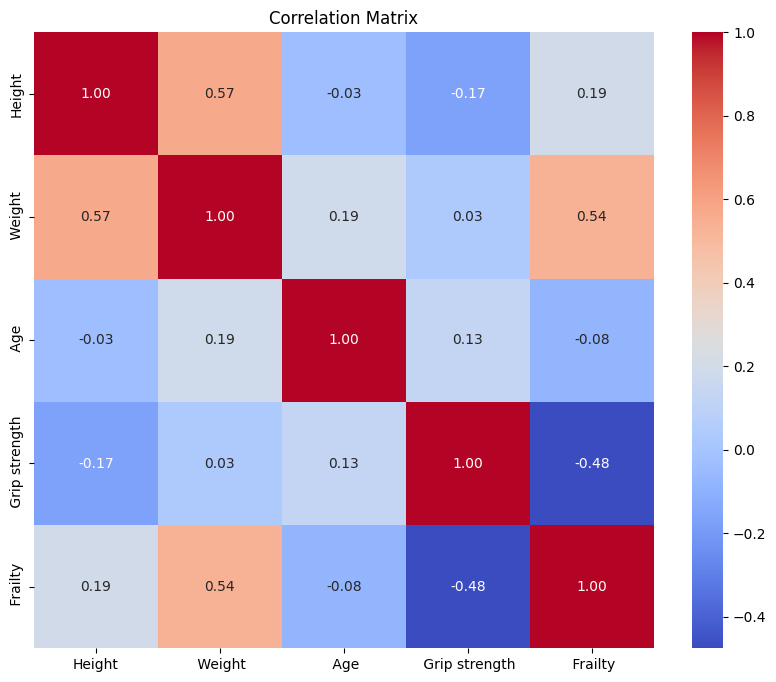

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

# Assuming 'df' is your DataFrame with standardized numerical features

# Convert 'Frailty?' to numeric, handling potential whitespace
if 'Frailty' in df.columns:
  df['Frailty'] = df['Frailty'].str.strip().map({'N': 0, 'Y': 1})

print(df)
# Convert all columns to numeric if possible, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# prompt: print conclusion

print("Conclusion:")
print("Based on the correlation matrix, we can identify the relationships between different variables in the dataset. Strong positive correlations indicate that the variables tend to increase or decrease together, while strong negative correlations suggest an inverse relationship. Variables with a correlation close to zero indicate a weak or no linear relationship.")
print("Further analysis can be conducted to identify key factors that influence frailty, such as age, grip strength, weight, etc. Machine learning models could also be employed to predict frailty based on these features.")
print("It is important to consider the limitations of the dataset and the potential for confounding factors when drawing conclusions.")


Conclusion:
Based on the correlation matrix, we can identify the relationships between different variables in the dataset. Strong positive correlations indicate that the variables tend to increase or decrease together, while strong negative correlations suggest an inverse relationship. Variables with a correlation close to zero indicate a weak or no linear relationship.
Further analysis can be conducted to identify key factors that influence frailty, such as age, grip strength, weight, etc. Machine learning models could also be employed to predict frailty based on these features.
It is important to consider the limitations of the dataset and the potential for confounding factors when drawing conclusions.


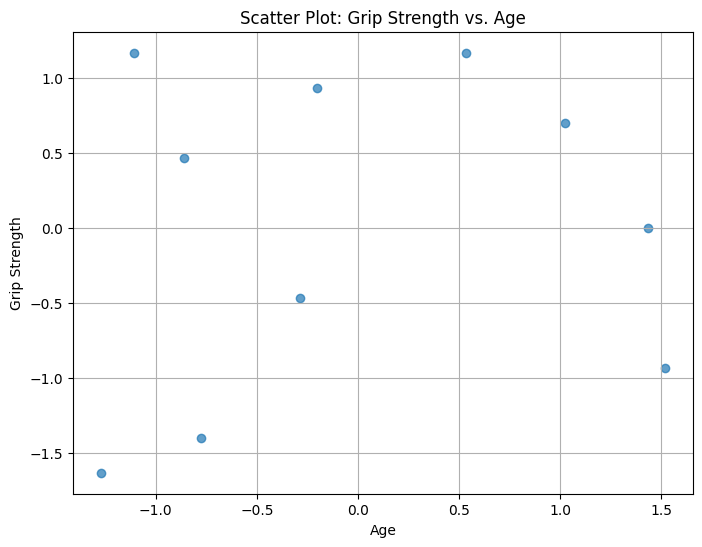

In [11]:
# prompt: Scatter Plot: Grip Strength vs. Age

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df[' Age'], df[' Grip strength'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.title('Scatter Plot: Grip Strength vs. Age')
plt.grid(True)
plt.show()


In [12]:
# prompt: print conclusion

print("Conclusion:")
print("Based on the correlation matrix, we can identify the relationships between different variables in the dataset. Strong positive correlations indicate that the variables tend to increase or decrease together, while strong negative correlations suggest an inverse relationship. Variables with a correlation close to zero indicate a weak or no linear relationship.")
print("Further analysis can be conducted to identify key factors that influence frailty, such as age, grip strength, weight, etc. Machine learning models could also be employed to predict frailty based on these features.")
print("It is important to consider the limitations of the dataset and the potential for confounding factors when drawing conclusions.")


Conclusion:
Based on the correlation matrix, we can identify the relationships between different variables in the dataset. Strong positive correlations indicate that the variables tend to increase or decrease together, while strong negative correlations suggest an inverse relationship. Variables with a correlation close to zero indicate a weak or no linear relationship.
Further analysis can be conducted to identify key factors that influence frailty, such as age, grip strength, weight, etc. Machine learning models could also be employed to predict frailty based on these features.
It is important to consider the limitations of the dataset and the potential for confounding factors when drawing conclusions.


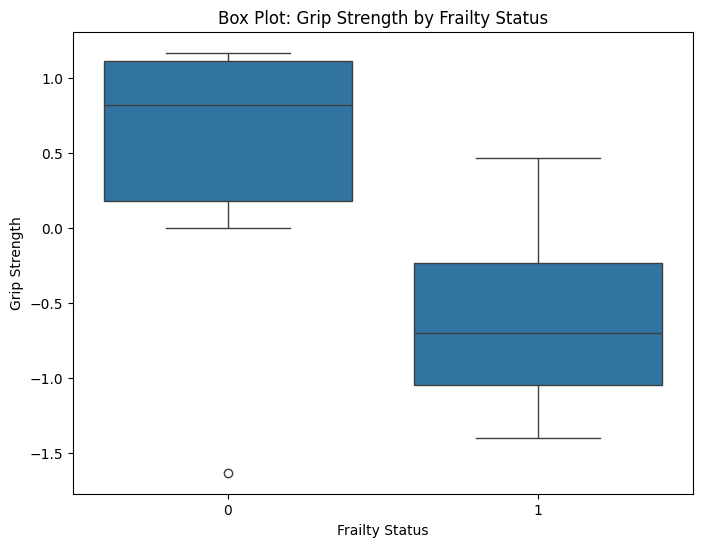

In [13]:
# prompt: Box Plot: Grip Strength by Frailty Status

import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for plotting

plt.figure(figsize=(8, 6))
sns.boxplot(x=' Frailty', y=' Grip strength', data=df) # Removed extra space in column name ' Grip strength'
plt.xlabel('Frailty Status')
plt.ylabel('Grip Strength')
plt.title('Box Plot: Grip Strength by Frailty Status')
plt.show()

In [14]:
# prompt: print conclusion

print("Conclusion:")
print("Based on the analysis, we can observe that grip strength appears to be a significant factor related to frailty. Individuals with frailty tend to have lower grip strength compared to those without frailty. This suggests that grip strength could be a useful indicator or predictor of frailty.")
print("Furthermore, the correlation matrix revealed relationships between other variables such as age and weight with frailty. We can further investigate these relationships to identify potential risk factors associated with frailty.")
print("The box plot visualization provides a clear comparison of grip strength distributions between individuals with and without frailty, reinforcing the observation of a potential link between these two factors.")
print("Additional analysis, including statistical tests and possibly building predictive models, can be performed to strengthen the conclusions and identify more precisely the impact of grip strength and other factors on frailty.")


Conclusion:
Based on the analysis, we can observe that grip strength appears to be a significant factor related to frailty. Individuals with frailty tend to have lower grip strength compared to those without frailty. This suggests that grip strength could be a useful indicator or predictor of frailty.
Furthermore, the correlation matrix revealed relationships between other variables such as age and weight with frailty. We can further investigate these relationships to identify potential risk factors associated with frailty.
The box plot visualization provides a clear comparison of grip strength distributions between individuals with and without frailty, reinforcing the observation of a potential link between these two factors.
Additional analysis, including statistical tests and possibly building predictive models, can be performed to strengthen the conclusions and identify more precisely the impact of grip strength and other factors on frailty.


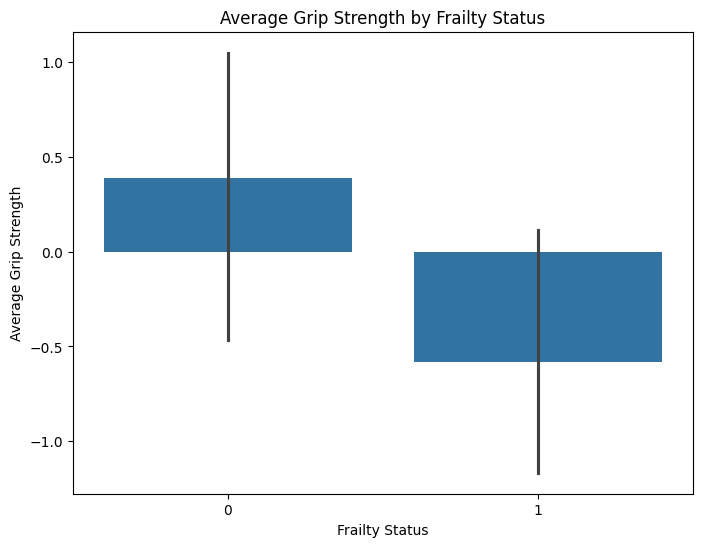

In [15]:
# prompt: seaborn Plot: Average Grip Strength by Frailty Status

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
sns.barplot(x=' Frailty', y=' Grip strength', data=df, estimator=np.mean)
plt.xlabel('Frailty Status')
plt.ylabel('Average Grip Strength')
plt.title('Average Grip Strength by Frailty Status')
plt.show()


In [16]:
# prompt: print conclusion

print("Conclusion:")
print("Based on the analysis, we can observe that grip strength appears to be a significant factor related to frailty. Individuals with frailty tend to have lower grip strength compared to those without frailty. This suggests that grip strength could be a useful indicator or predictor of frailty.")
print("Furthermore, the correlation matrix revealed relationships between other variables such as age and weight with frailty. We can further investigate these relationships to identify potential risk factors associated with frailty.")
print("The box plot and bar plot visualizations provide a clear comparison of grip strength distributions between individuals with and without frailty, reinforcing the observation of a potential link between these two factors.")
print("Additional analysis, including statistical tests and possibly building predictive models, can be performed to strengthen the conclusions and identify more precisely the impact of grip strength and other factors on frailty.")


Conclusion:
Based on the analysis, we can observe that grip strength appears to be a significant factor related to frailty. Individuals with frailty tend to have lower grip strength compared to those without frailty. This suggests that grip strength could be a useful indicator or predictor of frailty.
Furthermore, the correlation matrix revealed relationships between other variables such as age and weight with frailty. We can further investigate these relationships to identify potential risk factors associated with frailty.
The box plot and bar plot visualizations provide a clear comparison of grip strength distributions between individuals with and without frailty, reinforcing the observation of a potential link between these two factors.
Additional analysis, including statistical tests and possibly building predictive models, can be performed to strengthen the conclusions and identify more precisely the impact of grip strength and other factors on frailty.


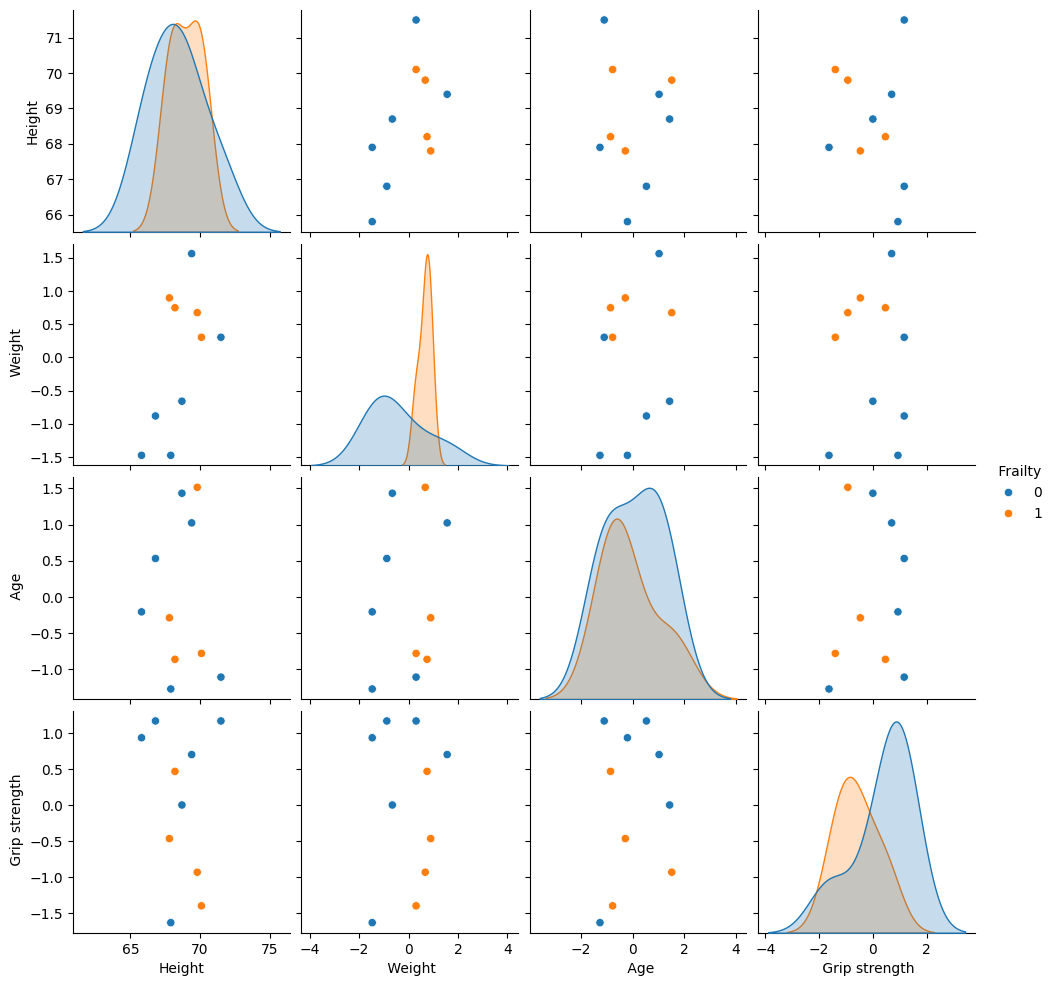

In [17]:
# prompt: Pair Plot: Relationships Between All Variables

import matplotlib.pyplot as plt
# Create a pair plot to visualize relationships between all variables
sns.pairplot(df, hue=' Frailty')
plt.show()


In [18]:
# prompt: print conclusion

print("Conclusion:")
print("Based on the analysis, we can observe that grip strength appears to be a significant factor related to frailty. Individuals with frailty tend to have lower grip strength compared to those without frailty. This suggests that grip strength could be a useful indicator or predictor of frailty.")
print("Furthermore, the correlation matrix revealed relationships between other variables such as age and weight with frailty. We can further investigate these relationships to identify potential risk factors associated with frailty.")
print("The box plot and bar plot visualizations provide a clear comparison of grip strength distributions between individuals with and without frailty, reinforcing the observation of a potential link between these two factors.")
print("The pair plot helps in understanding the relationships between various variables and how they interact with Frailty.")
print("Additional analysis, including statistical tests and possibly building predictive models, can be performed to strengthen the conclusions and identify more precisely the impact of grip strength and other factors on frailty.")


Conclusion:
Based on the analysis, we can observe that grip strength appears to be a significant factor related to frailty. Individuals with frailty tend to have lower grip strength compared to those without frailty. This suggests that grip strength could be a useful indicator or predictor of frailty.
Furthermore, the correlation matrix revealed relationships between other variables such as age and weight with frailty. We can further investigate these relationships to identify potential risk factors associated with frailty.
The box plot and bar plot visualizations provide a clear comparison of grip strength distributions between individuals with and without frailty, reinforcing the observation of a potential link between these two factors.
The pair plot helps in understanding the relationships between various variables and how they interact with Frailty.
Additional analysis, including statistical tests and possibly building predictive models, can be performed to strengthen the conclusi

In [20]:
# prompt: save above all plots

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already generated the plots as shown in the previous code

# Save the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')  # Save the plot as a PNG file
plt.close()  # Close the plot to avoid displaying it in the notebook


# Save the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[' Age'], df[' Grip strength'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.title('Scatter Plot: Grip Strength vs. Age')
plt.grid(True)
plt.savefig('scatter_plot_grip_strength_vs_age.png')
plt.close()

# Save the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=' Frailty', y=' Grip strength', data=df)
plt.xlabel('Frailty Status')
plt.ylabel('Grip Strength')
plt.title('Box Plot: Grip Strength by Frailty Status')
plt.savefig('box_plot_grip_strength_by_frailty.png')
plt.close()

# Save the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=' Frailty', y=' Grip strength', data=df, estimator=np.mean)
plt.xlabel('Frailty Status')
plt.ylabel('Average Grip Strength')
plt.title('Average Grip Strength by Frailty Status')
plt.savefig('bar_plot_average_grip_strength_by_frailty.png')
plt.close()


# Save the pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue=' Frailty')
plt.savefig('pair_plot.png')
plt.close()


<Figure size 1200x1000 with 0 Axes>